# **Airbnb Listing Bangkok Analysis with Python**

### **BACKGROUND** 
Airbnb adalah jaringan pasar daring dan penginapan rumahan sejawat yang memungkinkan pengguna mendaftarkan atau menyewa properti untuk digunakan dalam jangka pendek. Harga sewanya ditetapkan oleh pemilik properti. Airbnb memiliki cabang diberbagai negara salah satu cabangnya ada di Bangkok. Airbnb Bangkok mau menganalisis apakah Reviews dapat mempengaruhi pengambilan keputusan seseorang dalam memilih tempat hunian ataupun reviews berpengaruh terhadap harga sewa tempat hunian. Beberapa parameter akan digunakan yaitu:
- Mencari tahu tipe hunian apa saja yang terlisting di aplikasi Airbnb.
- Mencari tahu tipe hunian apa yang memiliki review terbanyak. 
- Neighbourhood apa yang memiliki tempat hunian terbanyak.
- Mencari tahu tipe hunian apa yang memiliki review paling sedikit.
- Mencari tahu berapa jumlah hunian yang memiliki review dan yang tidak memiliki review.
<br>

**Stakeholders** > Airbnb Product Owner Perwakilan Bangkok
<br>

**Dataset** > Data Airbnb Listing in Bangkok



### **Data Understanding**
**Column Data Mentah**
| Feature                      | Deskripsi                                                                   |
|---------------------------------|-----------------------------------------------------------------------------|
| id                       | Pengenal unik Airbnb untuk tempat tersebut.               |
| name                       | Nama tempat hunian.               |
| host_id                       | Pengenal unik Airbnb untuk tuan rumah/pengguna.               |
| Host Name                       | Merupakan field untuk menampung data pemilik tempat tersebut               |
| neighborhood                      | Lingkungan ini di-geocode menggunakan garis lintang dan bujur terhadap lingkungan seperti yang didefinisikan oleh terbuka atau publik shapefile digital.              |
| Latitude & Longitude            | Field untuk lokasi (map)                                                    |
| Room Type                       | Tipe hunian yang bisa disewa melalui aplikasi Airbnb yang berlokasi di Bangkok |
| Price                           | Harga sewa hunian tersebut                                                 |
| Minimum Nights                  | Minimal lama waktu penyewaan tempat hunian                                  |
| Number of Reviews               | Jumlah review yang dimiliki hunian tersebut                                 |
| last_review              | Tanggal ulasan terakhir/terbaru.                                 |
| Calculated Host Listings Count | Jumlah tempat hunian yang dimiliki oleh pemilik yang terdapat di kota tersebut |
| availability_365 | avaliability_x. Kalender menentukan ketersediaan daftar x hari di masa depan. Catatan: tempat mungkin tersedia karena telah dipesan oleh tamu atau diblokir oleh tuan rumah. |
| number_of_reviews_ltm | Jumlah ulasan yang dimiliki daftar (dalam 12 bulan terakhir). |

<br>
Informasi lengkap mengenai tipe hunian 
<br>

| Room Type                       | Entire home/apartment, Private rooms, Shared rooms, Hotel |
|---------------------------------|-----------------------------------------------------------------------------|
| Entire home/apartment           |Seluruh tempat adalah yang terbaik jika Anda mencari rumah yang jauh darinya rumah. Dengan seluruh tempat, Anda akan memiliki seluruh ruangan dirimu sendiri. Ini biasanya mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk khusus yang terpisah. Tuan rumah harusnya catat dalam deskripsi apakah mereka akan berada di properti atau tidak (misal: "Tuan rumah menempati lantai pertama rumah") dan menyediakan lebih lanjut rincian pada daftar. |
| Private rooms                 | Kamar pribadi sangat cocok jika Anda menginginkan sedikit privasi, dan masih menghargai koneksi lokal. Saat Anda memesan kamar pribadi, Anda akan memiliki kamar pribadi untuk tidur dan mungkin berbagi beberapa ruang dengan orang lain. Anda mungkin perlu berjalan kaki melalui ruang dalam ruangan yang mungkin ditempati oleh tuan rumah atau tamu lain untuk sampai ke kamarmu. |
| Shared rooms                 | Kamar bersama diperuntukkan bagi Anda yang tidak keberatan berbagi ruang dengan orang lain. Saat Anda memesan kamar bersama, Anda akan tidur di ruang yang digunakan bersama dengan orang lain dan berbagi keseluruhan ruang dengan orang lain. Kamar bersama sangat populer di kalangan wisatawan fleksibel yang mencari teman baru dan penginapan ramah anggaran. |
| Hotel                 | Kamar hotel diperuntukkan bagi Anda yang sedang melakukan perjalanan ataupun yang sedang ingin menyewa tempat untuk istirahat. Hotel memiliki layanan room service yang dapat digunakan, akan tetapi barang-barang yang ada didalam kamar hotel tidak boleh dirusak ataupun diambil. | 

### **Goals** 
- Mencari Tahu Tipe hunian apa yang paling banyak ditemukan melalui aplikasi Airbnb yang berlokasi di Bangkok untuk setiap lokasi
- Menambahkan kebijakan baru supaya penyewa bisa memberikan review
- Memberikan rekomendasi untuk customer/penyewa yang sedang mencari hunian dilokasi tertentu di Bangkok

**Column yang digunakan untuk analisis**
| Field Name                      | Deskripsi                                                                   |
|---------------------------------|-----------------------------------------------------------------------------|
| Host Name                       | Merupakan field untuk menampung data pemilik tempat tersebut               |
| name                       | Name of the listing.               |
| Latitude & Longitude            | Field untuk lokasi (map)                                                    |
| Room Type                       | Tipe hunian yang bisa disewa melalui aplikasi Airbnb yang berlokasi di Bangkok |
| Price                           | Harga sewa hunian tersebut                                                 |
| Minimum Nights                  | Minimal lama waktu penyewaan tempat hunian                                  |
| Number of Reviews               | Jumlah review yang dimiliki hunian tersebut                                 |
| Calculated Host Listings Count | Jumlah tempat hunian yang dimiliki oleh pemilik yang terdapat di kota tersebut |

<br>

**Column Tambahan**

| Field Name                      | Deskripsi                                                                   |
|---------------------------------|-----------------------------------------------------------------------------|
| Total Price | Total Harga sewa berdasarkan dari minimum nights |
| Reviews | Untuk mengetahui apakah Listings room yang ada di Airbnb Bangkok memiliki reviews atau tidak |

## **A. Importing Libraries**

Library yang diimport akan digunakan dalam proses analisis

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

## **B. Importing Dataset**

Dataset yang digunakan yaitu Airbnb Listings Bangkok dalam bentuk format csv

In [41]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## **C. Data Wrangling & Cleaning**

Disini kita akan mengecek anomali serta missing value yang terdapat didalam dataset Airbnb Bangkok kemudian anomali dan missing value tersebut akan diatasi atau dihandle

Mengecek info data kita berupa nama kolum, berapa count dari rownya serta datatype dari setiap column

In [42]:
df.info() # Checking Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**Check Duplicate Data**
<br>
mengecek apakah dataset yang kita miliki itu memiliki data yang duplikat atau tidak

In [43]:
df[df.duplicated()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Dari hasil pengecekan tersebut ditemukan tidak ada data yang terduplikasi

**Rename The Column Name**
<br>
Mengubah nama Column sehingga lebih mudah untuk dibaca

In [44]:
df.rename(columns = {'host_name' : 'Host Name', 
                     'room_tpye' : 'Room Type',
                     'minimum_nights': 'Minimum Night', 
                     'number_of_reviews' : 'Number of Reviews', 
                     'calculated_host_listings_count' : 'Host Listings Count',
                     'name' : 'Room Title',
                     'host_id' : 'HostID',
                     'neighbourhood' : 'Neighbourhood',
                     'price' : 'Price',
                     'room_type' : 'Room Type',
                     'reviews_per_month' : 'Review per Month',
                     'availability_365': 'Availability',
                     'number_of_reviews_ltm' : 'Number of Reviews_ltm'}, inplace = True)

**Checking Missing Values**


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15854 non-null  int64  
 1   id                     15854 non-null  int64  
 2   Room Title             15846 non-null  object 
 3   HostID                 15854 non-null  int64  
 4   Host Name              15853 non-null  object 
 5   Neighbourhood          15854 non-null  object 
 6   latitude               15854 non-null  float64
 7   longitude              15854 non-null  float64
 8   Room Type              15854 non-null  object 
 9   Price                  15854 non-null  int64  
 10  Minimum Night          15854 non-null  int64  
 11  Number of Reviews      15854 non-null  int64  
 12  last_review            10064 non-null  object 
 13  Review per Month       10064 non-null  float64
 14  Host Listings Count    15854 non-null  int64  
 15  Av

Ditemukan bahwa untuk data Room Title, Host Name, Review per Month masih terdapat missing values atau jumlah count rows nya masih belum sesuai

**Handle Missing Values**

In [46]:
room = df[df['Room Title'].isna()]
host = df[df['Host Name'].isna()]
room
host

,Unnamed: 0,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,last_review,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [47]:
df['Room Title'].fillna(value = 'No Title', inplace = True)
df['Host Name'].fillna(value = 'No Name', inplace = True)
df['Number of Reviews'].fillna(value = 0 , inplace = True)
df['Review per Month'].fillna(value = 0, inplace = True)

Untuk missing Value pada column Room Title, Host Name, Number of Reviews, Review per Month, sudah terisi
- Untuk missing value di column Room Title diisi dengan "No Title"
- Untuk missing value di column Host Name diisi dengan "No Name"
- Untuk missing value di column Number of Reviews diisi dengan "0"
- Untuk missing value di column Review per Month diisi dengan "0"


In [48]:
df

,Unnamed: 0,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,last_review,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,0.00,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,0.00,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,0.00,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,0.00,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,0.00,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,0.00,14,365,0


**Dropping Tables**
<br>
Kolum yang tidak akan digunakan akan didrop sehingga membuat kita lebih mudah untuk melihat data yang kita gunakan

In [49]:
df.drop(['Unnamed: 0', 'last_review'], axis = 1, inplace = True)

In [50]:
df.describe()

,id,HostID,latitude,longitude,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [51]:
df_numeric = df[['Price', 'Host Listings Count']]

In [52]:
# filtering out listings with prices that have extreme prices (outliers)
lower = df["Price"].quantile(0.01)
upper  = df["Price"].quantile(0.99)

df = df[(df["Price"] < upper) & (df["Price"] > lower)]

Untuk mengfilter prices yang memiliki nilai yang extreme seperti terlalu tinggi dan terlalu rendah dari outliers

In [53]:
df.describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

,id,HostID,latitude,longitude,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
count,1.550600e+04,1.550600e+04,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000
mean,1.598524e+17,1.538778e+08,13.745148,100.559839,2077.597575,14.974461,16.840191,0.523944,14.079195,243.809558,3.539533
std,2.958578e+17,1.320146e+08,0.043024,0.050772,2097.000546,49.296099,40.897102,0.960400,30.563774,125.867604,8.987972
min,2.793400e+04,5.892000e+04,13.527300,100.329550,351.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104506e+07,3.948758e+07,13.720105,100.529870,900.000000,1.000000,0.000000,0.000000,1.000000,137.000000,0.000000
50%,3.510700e+07,1.223632e+08,13.738490,100.561325,1430.000000,1.000000,2.000000,0.090000,4.000000,308.000000,0.000000
75%,5.288465e+07,2.385169e+08,13.759350,100.584969,2400.000000,7.000000,14.000000,0.690000,13.000000,360.000000,3.000000
95%,7.620924e+17,4.390397e+08,13.827505,100.640499,6000.000000,45.000000,87.000000,2.340000,48.000000,365.000000,19.000000
99%,7.859206e+17,4.849958e+08,13.911089,100.726712,11939.400000,360.000000,200.000000,4.210000,228.000000,365.000000,38.950000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,17904.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Untuk data statistik ini ingin mengecek nilai tertinggi dari Price, review yang tertinggi, dan jumlah host listings

In [54]:
listing = df[df['Host Listings Count'] == 228]
listing

,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
6473,31029786,Near The Grand Palace/ASOK Station/Sukhumvit#05,201677068,Curry,Khlong Toei,13.735100,100.559190,Entire home/apt,2057,1,60,1.24,228,361,18
6479,30804041,Near The Grand Palace/ASOK Station/Sukhumvit 5...,201677068,Curry,Khlong Toei,13.733850,100.557140,Entire home/apt,2057,1,76,1.55,228,361,19
6672,31607546,Near The Grand Palace/ASOK Station/Sukhumvit#06,201677068,Curry,Khlong Toei,13.733950,100.558800,Entire home/apt,2057,1,101,2.10,228,361,20
7009,32504596,New! Sukhumvit NANA 1BR Suit near BTS 2PPL,201677068,Curry,Ratchathewi,13.750870,100.555970,Entire home/apt,1466,3,86,1.87,228,356,14
7244,32970026,30days! Sukhumvit NANA spacious 1BR 2PPL near...,201677068,Curry,Ratchathewi,13.749710,100.556570,Entire home/apt,1466,3,81,1.78,228,358,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,750412362717761633,New!Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.735637,100.557799,Entire home/apt,3429,1,3,3.00,228,360,3
15336,771365335830828138,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.750300,100.555503,Entire home/apt,3994,3,0,0.00,228,340,0
15474,780130696121233047,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池...,201677068,Curry,Khlong Toei,13.718087,100.580706,Entire home/apt,1588,30,0,0.00,228,304,0
15515,777296851892558815,One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK...,201677068,Curry,Ratchathewi,13.756598,100.540777,Entire home/apt,2000,25,0,0.00,228,348,0


Ditemukan bahwa Pemilik Hunian terbanyak yang terlisting di Airbnb Bangkok yaitu Curry dengan total jumlah hunian yang terlisting di Airbnb Bangkok sebanyak 228

In [55]:
price = df[df['Price'] == 11871]
price

,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
10628,42556478,"Ascott Sathorn Bangkok, 1 Bedroom Premier Apt",85221401,Soros,Sathon,13.71695,100.51799,Private room,11871,1,0,0.0,6,361,0


Hunian yang memiliki harga sewa permalam yang tertinggi merupakan hunian dengan tipe Private Room

In [56]:
review = df[df['Number of Reviews'] == 1224]
review

,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,19.13,1,310,109


Hunian yang memiliki review tertinggi merupakan tipe hunian Entire Home/Apartment yang berlokasi di Phaya Thai dengan rating review permonth sebesar 19.13

**Create New Column for Total Price**

In [57]:
df['Total Price'] = df['Price']*df['Minimum Night']
df

,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm,Total Price
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0,5715
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0,1316
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0,48000
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1,9002
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0,1905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0,64344
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0,1429
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0,1214
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0,1214


Menambahkan Column baru "Reviews" untuk mengkategorikan apakah listing tersebut memiliki review atau tidak

In [58]:
df['Reviews'] = df['Number of Reviews'].apply(lambda x: 'No Reviews' if x == 0 else 'Has Reviews')
df


,id,Room Title,HostID,Host Name,Neighbourhood,latitude,longitude,Room Type,Price,Minimum Night,Number of Reviews,Review per Month,Host Listings Count,Availability,Number of Reviews_ltm,Total Price,Reviews
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0,5715,Has Reviews
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0,1316,No Reviews
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0,48000,No Reviews
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1,9002,Has Reviews
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0,1905,No Reviews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0,64344,No Reviews
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0,1429,No Reviews
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0,1214,No Reviews
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0,1214,No Reviews


In [59]:
reviewCount = df['Reviews'].value_counts()
reviewCount

Reviews
Has Reviews    9909
No Reviews     5597
Name: count, dtype: int64

Menambahkan kolum Total Price dengan mengambil data dari kolum price dan minimum night kemudian nilai dari price dikali dengan nilai minimum night

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15506 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15506 non-null  int64  
 1   Room Title             15506 non-null  object 
 2   HostID                 15506 non-null  int64  
 3   Host Name              15506 non-null  object 
 4   Neighbourhood          15506 non-null  object 
 5   latitude               15506 non-null  float64
 6   longitude              15506 non-null  float64
 7   Room Type              15506 non-null  object 
 8   Price                  15506 non-null  int64  
 9   Minimum Night          15506 non-null  int64  
 10  Number of Reviews      15506 non-null  int64  
 11  Review per Month       15506 non-null  float64
 12  Host Listings Count    15506 non-null  int64  
 13  Availability           15506 non-null  int64  
 14  Number of Reviews_ltm  15506 non-null  int64  
 15  Total P

Jumlah Data setelah dilakukan cleaning tersisa 15506

Kemudian mengecek outliers untuk data Price dan Host Listing Count

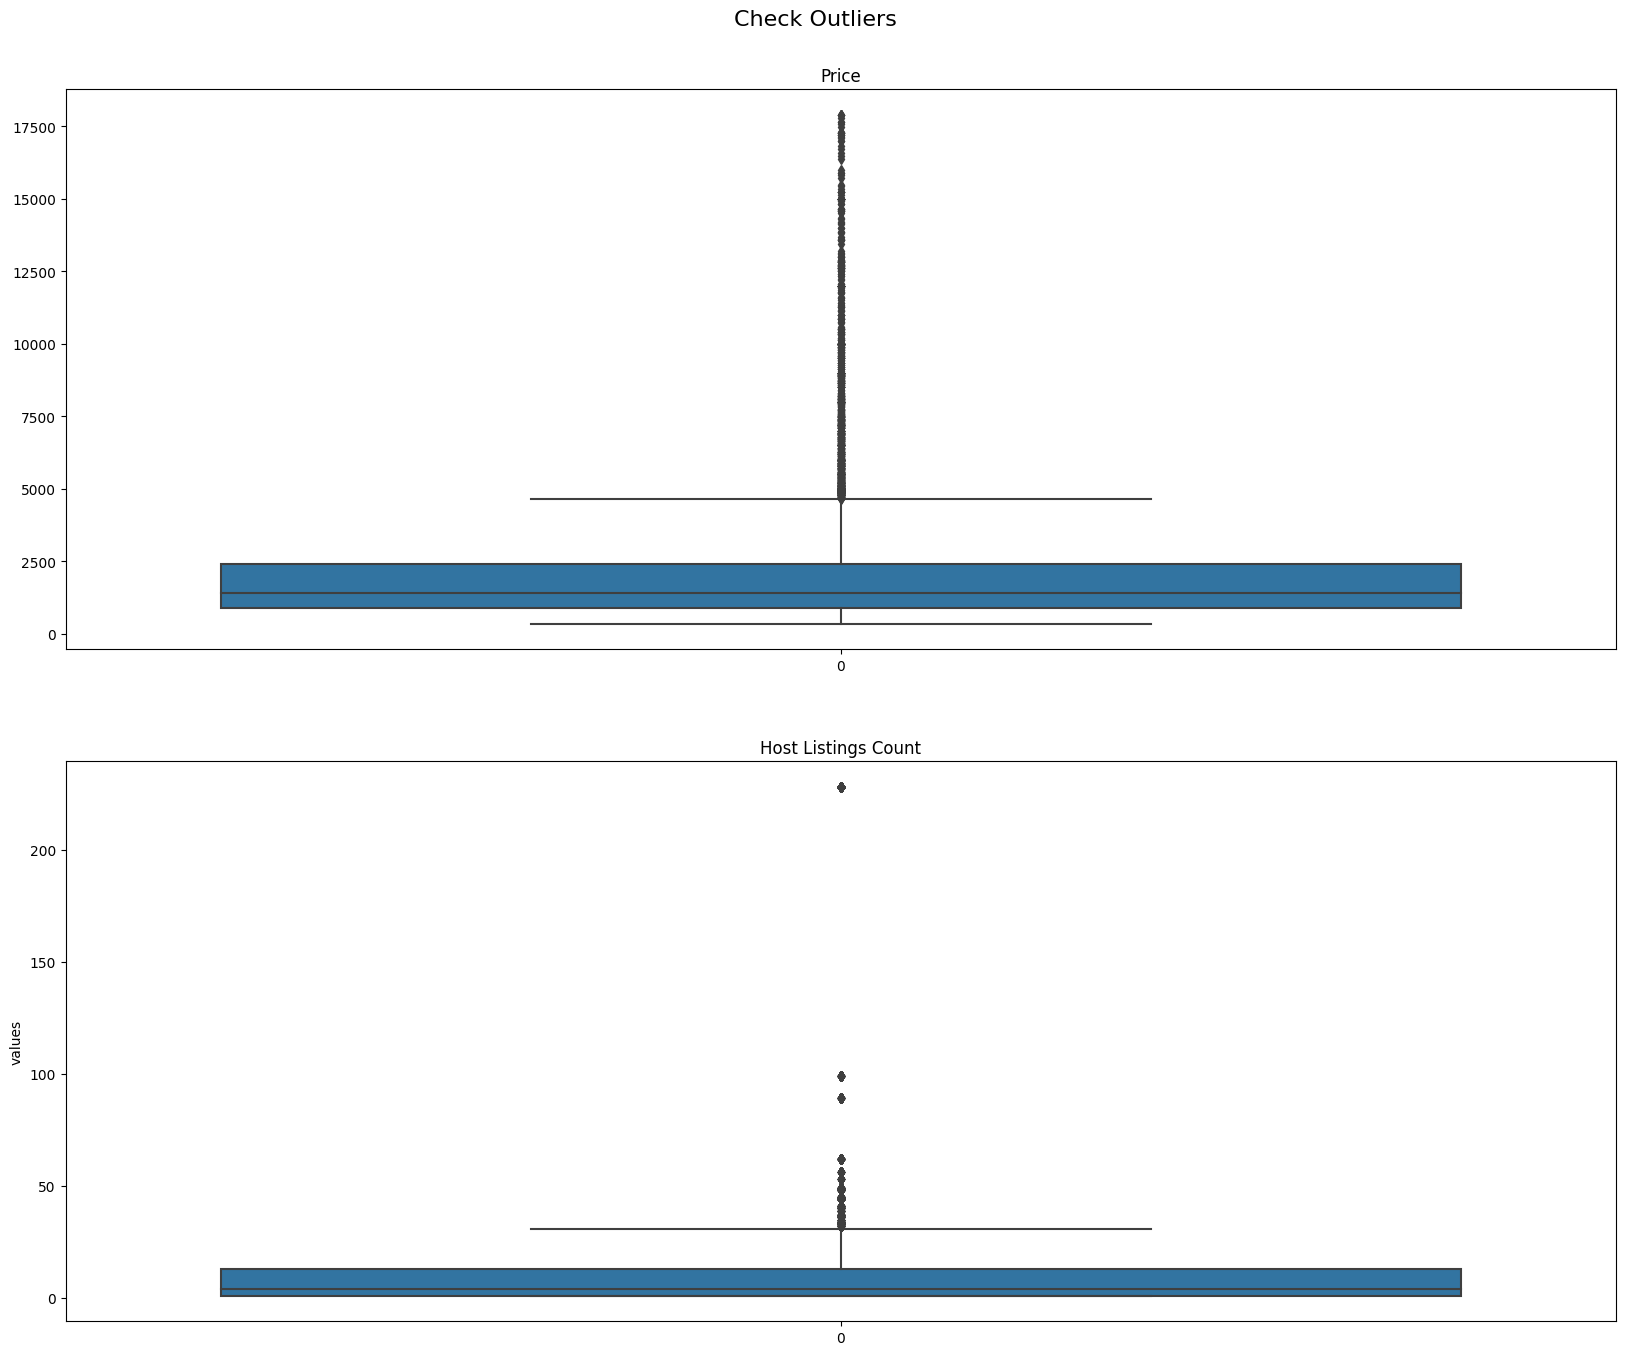

In [61]:
def boxplot_custom(dataset, columns_list, cols, suptitle, size = (20, 16)) :
    fig, axs = plt.subplots(cols, figsize = size)
    fig.suptitle(suptitle, y = 0.93, size = 16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[1].set_ylabel('values')
        sns.boxplot(data = dataset[data], orient = 'v', ax = axs[i])
        axs[i].set_title(data)
boxplot_custom(dataset = df, columns_list = df_numeric,cols = 2, suptitle = 'Check Outliers')


Hasil dari outliers ini ditemukan bahwa data untuk price dan host listings count tersebar Right Skwed atau tidak normal

In [62]:
df.to_excel('Airbnb Listing Bangkok Updated.xlsx')

Data yang telah dibersihkan di convert ke data clean excel yang akan digunakan untuk Data Analysis di Tableau

Pada proses melakukan Data Cleaning & Data Wrangling
- Untuk dataset Airbnb Bangkok tidak memiliki duplicate values
- mendrop Column yang tidak digunakan yaitu column "Unnamed: 0 & last_review"
- Mengisi missing value di column Room Title, Host Name, Number of Reviews, & Review per Month
- Mengubah nama column sesuai dengan kebutuhan
- Mengfilter value yang di column Price yang memiliki outliers yang extreme
- Menambahkan column Total Price yang dibuat berdasarkan perkalian value di column Price & Minimum Night
- Ditemukan bahwa data outliers di column Price dan Host Listing Count terdistribusi right skewd atau tidak normal

**Check Unique Values**

In [63]:
list = []
for i in df.columns:
    list.append([i,df[i].nunique()])

pd.DataFrame(list, columns = ['Nama Column','Jumlah unique'])

,Nama Column,Jumlah unique
0,id,15506
1,Room Title,14471
2,HostID,6525
3,Host Name,5215
4,Neighbourhood,50
5,latitude,9467
6,longitude,10075
7,Room Type,4
8,Price,2911
9,Minimum Night,83


**Analisis Jumlah Listing dikategorikan berdasarkan lingkungan**

In [64]:
df['Neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

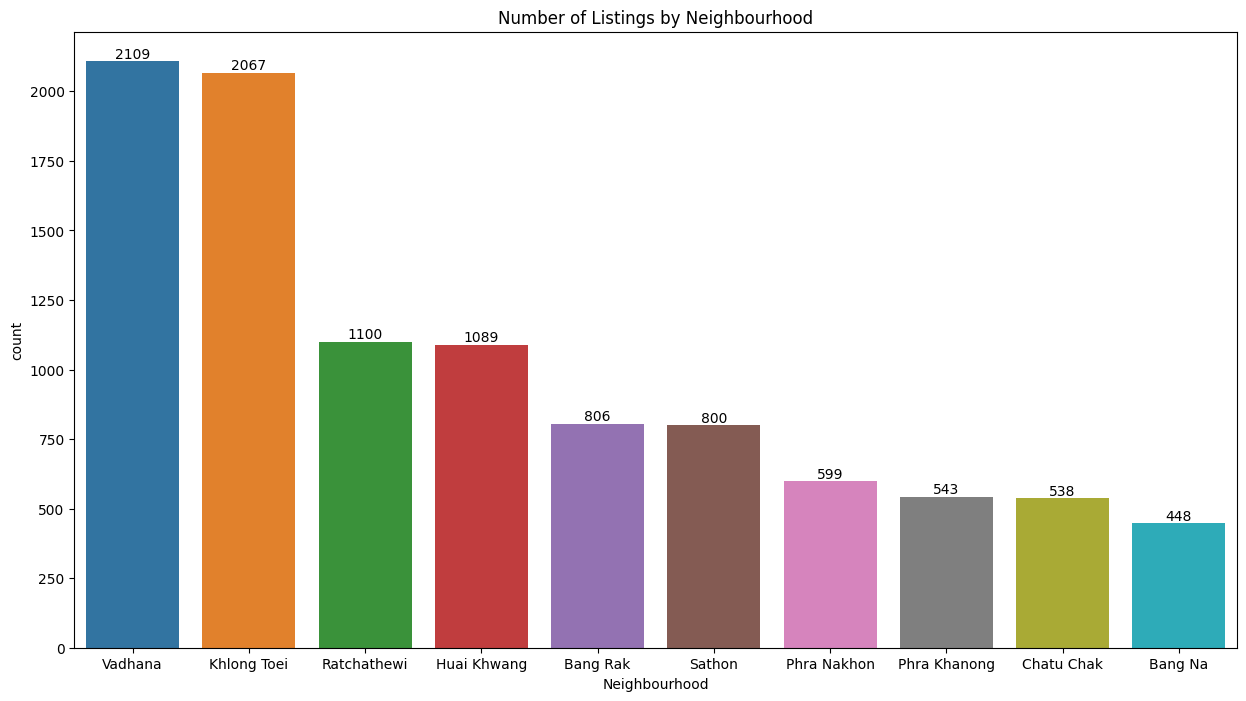

In [65]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Neighbourhood', data=df, order=df['Neighbourhood'].value_counts().head(10).index)
abs_values = df['Neighbourhood'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Listings by Neighbourhood')

plt.show()

**Findings** - Berdasarkan dari analisa ini ditemukan bahwa jumlah hunian yang terlisting di Airbnb Bangkok kebanyakan di disctrict Vadhana dan Khlong Toei
<br>

**Research Result** - Berdasarkan hasil riset terkait district yang terdapat didalam Bangkok ditemukan bahwa **Vadhana** merupakan salah satu district di Bangkok yang berlokasi di pusat kota Bangkok dan merupakan daerah yang padat penduduk dengan banyak fasilitas komersial, perbelanjaan, dan tempat-tempat penting. **Khlong Toei** terkenal karena memiliki pelabuhan kontainer terbesar di Thailand, yaitu Pelabuhan Khlong Toei. Selain itu, distrik ini juga memiliki berbagai fasilitas komersial, pemukiman, dan tempat-tempat penting lainnya.

**For Your Information** 
- Distrik **Ratchathewi** terletak di pusat kota Bangkok. Ini adalah rumah bagi beberapa tempat penting, termasuk Stasiun Ratchathewi yang penting, pusat perbelanjaan terkenal seperti MBK Center dan Siam Paragon, serta berbagai tempat makan dan akomodasi.
- **Huai Khwang**: Distrik Huai Khwang terletak di sebelah timur pusat kota Bangkok. Ini adalah rumah bagi sejumlah hiburan malam, termasuk kawasan karaoke dan klub malam. Selain itu, distrik ini juga memiliki beberapa pasar lokal dan restoran.
- **Bang Rak**: Distrik Bang Rak terletak di sepanjang Sungai Chao Phraya di pusat kota Bangkok. Ini adalah distrik bisnis dan komersial dengan banyak hotel, restoran, dan perkantoran. Salah satu tempat terkenal di distrik ini adalah Asiatique the Riverfront, kompleks perbelanjaan dan hiburan besar.
- **Sathon**: Sathon adalah distrik bisnis utama di Bangkok dengan banyak perkantoran dan gedung-gedung pencakar langit. Kawasan ini juga memiliki banyak hotel mewah dan pusat perbelanjaan. Terdapat banyak perusahaan multinasional dan kedutaan besar di Sathon.
- **Phra Nakhon**: Distrik Phra Nakhon adalah rumah bagi beberapa situs bersejarah paling terkenal di Bangkok, termasuk Istana Kerajaan dan Kuil Emerald Buddha. Ini juga berisi sejumlah taman, museum, dan pasar tradisional.
- **Phra Khanong**: Distrik Phra Khanong terletak di bagian timur Bangkok. Ini adalah area yang beragam dengan berbagai restoran, kafe, dan pusat perbelanjaan. Distrik ini terkenal dengan keragaman budayanya.
- **Chatuchak**: Distrik Chatuchak terkenal karena Pasar Chatuchak, salah satu pasar serbaguna terbesar di dunia. Selain pasar, distrik ini juga memiliki taman dan area perumahan.
- **Bang Na**: Bang Na terletak di sebelah tenggara pusat kota Bangkok. Ini adalah distrik yang berkembang pesat dengan pusat perbelanjaan modern seperti Mega Bangna, perumahan, dan fasilitas lainnya.

Setiap distrik di Bangkok memiliki karakteristik, budaya, dan fasilitasnya sendiri. Mereka menawarkan pengalaman yang berbeda-beda kepada penduduk dan pengunjung.

**Analisis Jumlah Room Type di Listings Airbnb Bangkok**

In [66]:
df['Room Type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [67]:
room = df['Room Type'].value_counts()
room

Room Type
Entire home/apt    8808
Private room       5645
Hotel room          622
Shared room         431
Name: count, dtype: int64

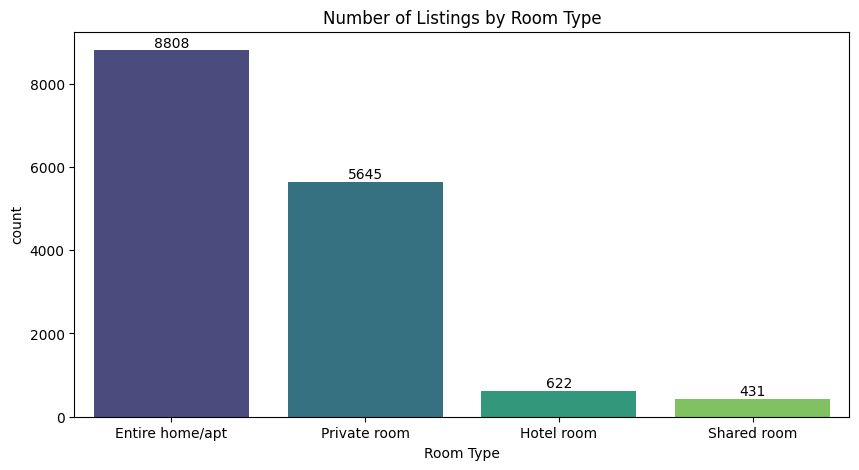

In [68]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='Room Type', data=df, order=df['Room Type'].value_counts().index, palette='viridis')
abs_values = df['Room Type'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=abs_values) #puts the labels on the bars
ax.set_title('Number of Listings by Room Type')
plt.show()

**Findings** - Ditemukan bahwa terdapat 8808 atau 56.8% hunian yang terlisting diaplikasi Airbnb Bangkok itu merupakan entire home/apartment.

Mengecek Persentase berupa jumlah orang yang memberikan review dan tidak memberikan review dan menambahkan kolum baru untuk mengetahui apakah listings room tersebut ada reviews atau tidak

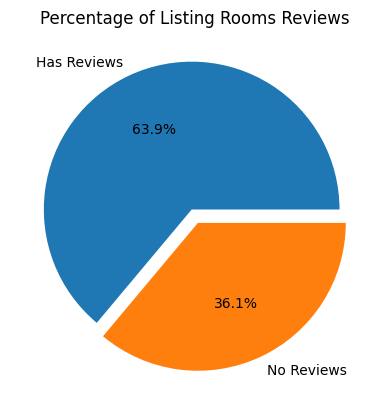

In [69]:
plt.subplot(1,1,1)
review = df['Reviews'].value_counts()
plt.pie(review, labels=review.index, autopct='%1.1f%%', explode = (0.05, 0.05) )
plt.title('Percentage of Listing Rooms Reviews')

plt.show()

**Findings** - Ditemukan bahwa terdapat 36% hunian yang tidak memiliki review <br>
Hal ini dapat memberikan terhadap pilihan seseorang dalam memilih hunian yang ingin disewa

Kemudian Mencari tipe hunian apa yang memiliki review terbanyak

In [70]:
reviewRoomCount = df.groupby(['Room Type'])['Number of Reviews'].count().sort_values(ascending = False)
reviewRoomCount

Room Type
Entire home/apt    8808
Private room       5645
Hotel room          622
Shared room         431
Name: Number of Reviews, dtype: int64

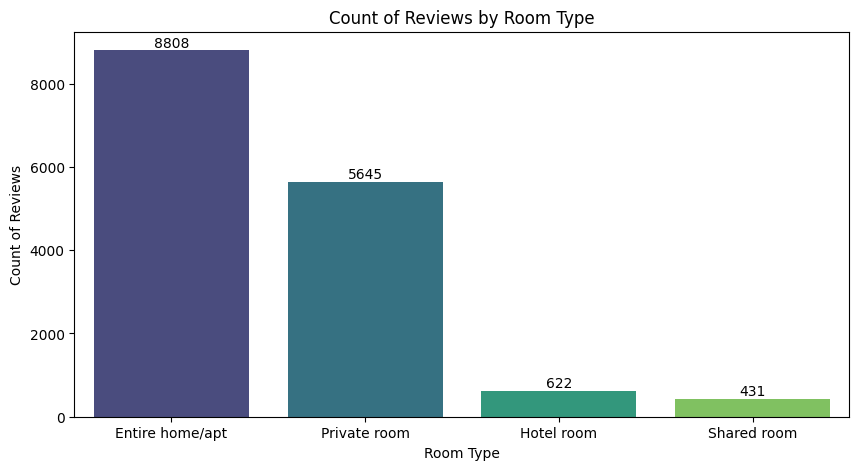

In [71]:
reviewRoomCount = reviewRoomCount.sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=reviewRoomCount.index, y=reviewRoomCount.values, palette='viridis')
abs_values = df['Room Type'].value_counts(ascending=False)

# Add labels and title
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xlabel('Room Type')
ax.set_ylabel('Count of Reviews')
ax.set_title('Count of Reviews by Room Type')

# Display the plot
plt.show()

**Findings** - Ditemukan bahwa Room Type yang memilik review tertinggi merupakan Entire Home/Apartment dengan total jumlah review sebanyak **8808** 

**Filtered Words in Column Names**

In [72]:
names = df['Room Title'].tolist()
name_words = []
for name in names:
    name = str(name).split()
    for word in name:
        name_words.append(word.lower())

In [73]:
import nltk # natural language toolkit
from nltk.corpus import stopwords
from nltk.util import ngrams

filtered_words = [word for word in name_words if word not in stopwords.words('english')]
print(filtered_words[:25])

['nice', 'room', 'superb', 'city', 'view', 'easy', 'going', 'landlord,easy', 'place', 'modern-style', 'apartment', 'bangkok', 'spacious', 'one', 'bedroom', 'kris', 'condo', 'bldg.', '3', 'suite', 'room', '3', 'metropoint', 'new', 'pro!!']


In [74]:
from collections import Counter # to count words in our list

# plotting top 25 words used by the host in naming their home
words_count = Counter(filtered_words).most_common()

**WordCloud untuk most used Words di Listing Name Airbnb**
<br>
mengecek kata apa yang paling banyak digunakan dalam mendeskripsikan informasi terkait hunian yang disewa (Bonus Analysis)

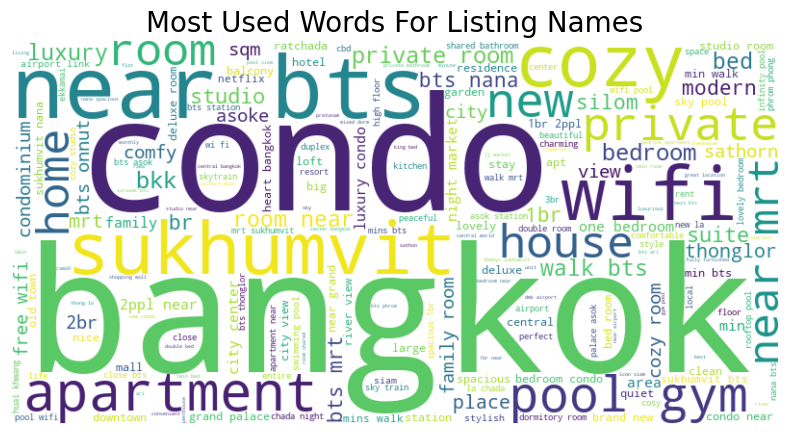

In [75]:
from wordcloud import WordCloud
top_words = [word[0] for word in words_count]

# Filter the 'filtered_words' list to include only the top words
filtered_words = [word for word in filtered_words if word in top_words]

# Join the filtered words back into a single text
text = " ".join(filtered_words)

# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis labels and ticks
plt.title('Most Used Words For Listing Names', size=20)
plt.show()

Ditemukan bahwa kebanyakan judul dari hunian tersebut yaitu "Bangkok", "Condo", "near", "wifi", dll
<br>
Ini hanya informasi bonus yang diberikan untuk mencari tahu kira-kira keywords apa yang paling sering digunakan untuk mendeskripsikan hunian tersebut

## **Conclusions**

Bangkok merupakan salah satu pusat wisata yang ada di Thailand. Yang memiliki berbagai macam districts dengan karakteristiknya masing-masing yang memberikan suasana yang berbeda. Berdasarkan dari hasil analisa yang dilakukan ditemukan bahwa kebanyakan hunian yang terlisting di aplikasi Airbnb di Bangkok sebagian besar berada didaerah yang bergerak didistrik perbelanjaan dan bisnis/perkantoran. <br>

Berdasarkan dari hasil analisa tersebut, 
- ditemukan bahwa terdapat 4 tipe hunian yang terdapat di listing Airbnb Bangkok yaitu **Entire Home/Apartment, Private Room, Hotel Room, dan Shared Room.** 
- dapat dilihat bahwa masih ada banyak Room Type atau Hunian yang tidak memiliki review, sehingga hal tersebut dapat berdampak terhadap customer yang ingin mencari hunian dilokasi tersebut yang sesuai dengan kebutuhan mereka. <br>
- Dikarenakan tidak memiliki **Review**, maka hunian tersebut memiliki daya tarik yang kurang karena tidak memiliki testimoni ataupun review dari customer yang pernah menginap ditempat tersebut, sehingga pilihan hunian yang dapat dipilih semakin menyempit atau sedikit 
- Berdasarkan hasil riset terkait district yang terdapat didalam Bangkok ditemukan bahwa **Vadhana** merupakan salah satu district di Bangkok yang berlokasi di pusat kota Bangkok dan merupakan daerah yang padat penduduk dengan banyak fasilitas komersial, perbelanjaan, dan tempat-tempat penting. **Khlong Toei** terkenal karena memiliki pelabuhan kontainer terbesar di Thailand, yaitu Pelabuhan Khlong Toei. Selain itu, distrik ini juga memiliki berbagai fasilitas komersial, pemukiman, dan tempat-tempat penting lainnya. Dan Hunian lainnya yang terlisting di Airbnb Bangkok merupakan daerah pusat perbelanjaan, komersial dan bisnis/perkantoran

statement tentang pengaruh review dapat di persingkat

## **Recommendation**
Berdasarkan hasil dari Analisa yang telah dilakukan maka solusi ataupun rekomendasi yang dapat diterapkan yaitu
- Masih ada **36%** hunian yang terlisting di Airbnb Bangkok yang masih **belum memiliki review**. Maka disarankan untuk menetapkan sebuah **kebijakan baru** dimana User ataupun pelanggan yang sedang tinggal disana atau yang pernah tinggal disana untuk memberikan review, sehingga Review yang diberikan dapat bermanfaat untuk kedepannya. Sehingga hal tersebut dapat membantu customer ataupun diri kita sendiri dalam memilih tempat hunian yang ingin disewa. Untuk review tersebut dapat berupa Rating dari hunian tersebut serta informasi detail terkait apa yang dirasakan dan masukan untuk hunian tersebut.
- Dikarenakan listing hunian di Airbnb Bangkok kebanyakan merupakan Entire Home/Apartment dan Private Room. Maka kita dapat menonjolkan atau menampilkan pilihan hunian dengan Room Type Entire Home/Apartment dan Private Room kepada customer yang sedang mencari hunian di Airbnb Bangkok. Akan tetapi hal ini perlu diliat kembali berdasarkan dari lokasi district yang dipilih oleh users.
- Dikarenakan Wilayah **Vadhana, Khlong Toei merupakan daerah yang memiliki hunian listing terbanyak di Airbnb Bangkok**. Maka hal tersebut bisa menjadi sebuah **peluang bisnis** dimana Airbnb bisa bekerja sama dengan hunian-hunian lainnya yang mungkin masih belum terlisting di Airbnb kemudian melakukan pemasaran di daerah Vadhana dan Khlong Toei atau mungkin distrik terkenal lainnya

## **Link Tableau**

Berikut ini merupakan link hasil analisis yang dilakukan dengan menggunakan tools Tableau <br>
https://public.tableau.com/views/AnalisisReviewsListingAirbnbBangkok/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link